In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from google.colab import files
!rm -rf app_data.csv
uploaded = files.upload()

Saving app_data.csv to app_data.csv


In [4]:
import tensorflow as tf
import pandas as pd
import io
import numpy as np

In [5]:
file = ["app_data.csv"]

In [6]:
df = pd.read_csv(io.BytesIO(uploaded['app_data.csv']))

In [7]:
df.columns

Index(['Age', 'BMI', 'Sex', 'Height', 'Weight', 'Length_of_Stay', 'Management',
       'Severity', 'Diagnosis_Presumptive', 'Diagnosis', 'Alvarado_Score',
       'Paedriatic_Appendicitis_Score', 'Appendix_on_US', 'Appendix_Diameter',
       'Migratory_Pain', 'Lower_Right_Abd_Pain',
       'Contralateral_Rebound_Tenderness', 'Coughing_Pain', 'Nausea',
       'Loss_of_Appetite', 'Body_Temperature', 'WBC_Count',
       'Neutrophil_Percentage', 'Segmented_Neutrophils', 'Neutrophilia',
       'RBC_Count', 'Hemoglobin', 'RDW', 'Thrombocyte_Count',
       'Ketones_in_Urine', 'RBC_in_Urine', 'WBC_in_Urine', 'CRP', 'Dysuria',
       'Stool', 'Peritonitis', 'Psoas_Sign', 'Ipsilateral_Rebound_Tenderness',
       'US_Performed', 'US_Number', 'Free_Fluids', 'Appendix_Wall_Layers',
       'Target_Sign', 'Appendicolith', 'Perfusion', 'Perforation',
       'Surrounding_Tissue_Reaction', 'Appendicular_Abscess',
       'Abscess_Location', 'Pathological_Lymph_Nodes', 'Lymph_Nodes_Location',
       'Bowel

In [8]:
df.drop('Severity', axis = 1, inplace = True)
df.drop('Diagnosis_Presumptive', axis = 1, inplace = True)
df.drop('Diagnosis', axis = 1, inplace = True)

In [9]:
df['Management'].unique()

array(['conservative', nan, 'primary surgical', 'secondary surgical',
       'simultaneous appendectomy'], dtype=object)

In [10]:
df[df['Management'] == 'conservative'].head(10)

,Age,BMI,Sex,Height,Weight,Length_of_Stay,Management,Alvarado_Score,Paedriatic_Appendicitis_Score,Appendix_on_US,...,Abscess_Location,Pathological_Lymph_Nodes,Lymph_Nodes_Location,Bowel_Wall_Thickening,Conglomerate_of_Bowel_Loops,Ileus,Coprostasis,Meteorism,Enteritis,Gynecological_Findings
0,12.68,16.9,female,148.0,37.0,3.0,conservative,4.0,3.0,yes,...,NaN,yes,reUB,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,14.10,31.9,male,147.0,69.5,2.0,conservative,5.0,4.0,no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,NaN,NaN
2,14.14,23.3,female,163.0,62.0,4.0,conservative,5.0,3.0,no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,yes,NaN
3,16.37,20.6,female,165.0,56.0,3.0,conservative,7.0,6.0,no,...,NaN,yes,reUB,NaN,NaN,NaN,NaN,NaN,yes,NaN
4,11.08,16.9,female,163.0,45.0,3.0,conservative,5.0,6.0,yes,...,NaN,yes,reUB,NaN,NaN,NaN,NaN,NaN,yes,NaN
5,11.05,30.7,male,121.0,45.0,3.0,conservative,6.0,7.0,no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,8.98,19.4,female,140.0,38.5,3.0,conservative,5.0,6.0,no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7.06,NaN,female,NaN,21.5,2.0,conservative,3.0,3.0,no,...,NaN,yes,re UB,no,NaN,NaN,NaN,NaN,NaN,NaN
8,7.90,15.7,male,131.0,26.7,3.0,conservative,7.0,6.0,yes,...,NaN,yes,NaN,NaN,NaN,NaN,NaN,yes,NaN,NaN
9,14.34,14.9,male,174.0,45.5,3.0,conservative,4.0,4.0,yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Some initial observations and patterns that can be observed from a first glance of the first 10 'conservative' management values is that abcess_location are all null. There is a mix of males and females in the first 10 vales, and all age is under 15.

In [11]:
df[df['Management'] == 'primary surgical'].head(10)

,Age,BMI,Sex,Height,Weight,Length_of_Stay,Management,Alvarado_Score,Paedriatic_Appendicitis_Score,Appendix_on_US,...,Abscess_Location,Pathological_Lymph_Nodes,Lymph_Nodes_Location,Bowel_Wall_Thickening,Conglomerate_of_Bowel_Loops,Ileus,Coprostasis,Meteorism,Enteritis,Gynecological_Findings
484,7.37,19.66,male,131.5,34.0,7.0,primary surgical,7.0,6.0,no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
485,11.22,22.67,male,148.5,50.0,4.0,primary surgical,8.0,7.0,no,...,NaN,NaN,NaN,yes,NaN,NaN,yes,NaN,NaN,NaN
486,12.52,16.65,male,155.0,40.0,7.0,primary surgical,9.0,9.0,no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
487,9.89,21.08,male,154.0,50.0,7.0,primary surgical,6.0,4.0,yes,...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN
488,4.38,18.33,male,106.0,20.6,11.0,primary surgical,NaN,NaN,no,...,NaN,NaN,NaN,yes,NaN,yes,NaN,NaN,NaN,NaN
490,5.83,NaN,male,NaN,20.5,8.0,primary surgical,7.0,7.0,no,...,NaN,NaN,Lymphadenopathie,NaN,NaN,NaN,NaN,NaN,NaN,NaN
492,9.32,14.92,male,132.0,26.0,4.0,primary surgical,8.0,7.0,yes,...,NaN,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
493,14.79,17.37,male,154.0,41.2,5.0,primary surgical,4.0,3.0,yes,...,NaN,NaN,NaN,yes,NaN,NaN,NaN,NaN,NaN,NaN
494,5.72,14.36,female,118.0,20.0,5.0,primary surgical,5.0,4.0,no,...,NaN,yes,NaN,NaN,yes,NaN,NaN,NaN,yes,NaN
495,12.99,NaN,female,NaN,50.0,8.0,primary surgical,6.0,7.0,no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"In beiden Ovarien Zysten darstellbar, links Ov..."


Out of the first 10 training examples, the majority of patients are male. Most BMI are under 20, with only 2 above 20. The lengths of stay vary, but there seems to be similar Alvarado scores around 6-8. A lot of patients in this category are under the age of 10.

In [12]:
df[df['Management'] == 'secondary surgical'].head(10)

,Age,BMI,Sex,Height,Weight,Length_of_Stay,Management,Alvarado_Score,Paedriatic_Appendicitis_Score,Appendix_on_US,...,Abscess_Location,Pathological_Lymph_Nodes,Lymph_Nodes_Location,Bowel_Wall_Thickening,Conglomerate_of_Bowel_Loops,Ileus,Coprostasis,Meteorism,Enteritis,Gynecological_Findings
489,13.83,17.30,female,170.0,50.0,5.0,secondary surgical,3.0,2.0,no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,NaN,NaN
491,16.23,21.77,female,166.0,60.0,6.0,secondary surgical,NaN,NaN,yes,...,NaN,NaN,NaN,NaN,NaN,no,NaN,yes,NaN,NaN
499,18.36,NaN,female,NaN,NaN,4.0,secondary surgical,8.0,7.0,no,...,NaN,yes,rechter Unterbauch,no,NaN,NaN,NaN,yes,NaN,Ausschluss pathologischer Ovarialbefund
502,14.36,18.82,male,163.0,50.0,4.0,secondary surgical,10.0,7.0,yes,...,NaN,NaN,NaN,NaN,NaN,yes,NaN,NaN,NaN,NaN
504,12.66,17.60,male,145.0,37.0,8.0,secondary surgical,7.0,6.0,no,...,NaN,NaN,NaN,yes,NaN,NaN,NaN,NaN,NaN,NaN
508,16.25,31.38,female,174.0,95.0,4.0,secondary surgical,6.0,5.0,yes,...,NaN,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
512,9.25,18.81,male,144.0,39.0,4.0,secondary surgical,8.0,6.0,no,...,NaN,yes,NaN,NaN,NaN,NaN,NaN,yes,NaN,NaN
518,12.59,15.62,female,164.0,42.0,4.0,secondary surgical,8.0,5.0,yes,...,NaN,NaN,NaN,NaN,NaN,no,no,NaN,NaN,NaN
527,12.56,15.79,female,151.0,36.0,NaN,secondary surgical,NaN,NaN,no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
535,14.95,20.32,female,163.0,54.0,3.0,secondary surgical,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The majority of patients in this first 10 training example for secondary surgical are over the age of 10, and most are also female. Most do not have pathological lymph nodes.

In [13]:
df[df['Management'] == 'simultaneous appendectomy'].head(10)

,Age,BMI,Sex,Height,Weight,Length_of_Stay,Management,Alvarado_Score,Paedriatic_Appendicitis_Score,Appendix_on_US,...,Abscess_Location,Pathological_Lymph_Nodes,Lymph_Nodes_Location,Bowel_Wall_Thickening,Conglomerate_of_Bowel_Loops,Ileus,Coprostasis,Meteorism,Enteritis,Gynecological_Findings
773,15.07,18.83,female,158.0,47.0,4.0,simultaneous appendectomy,5.0,7.0,no,...,NaN,NaN,NaN,NaN,NaN,no,NaN,yes,NaN,NaN


There is only one patient in the simultaneous appendectomy category, so nothing can be drawn regarding patterns etc.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 55 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Age                               781 non-null    float64
 1   BMI                               755 non-null    float64
 2   Sex                               780 non-null    object 
 3   Height                            756 non-null    float64
 4   Weight                            779 non-null    float64
 5   Length_of_Stay                    778 non-null    float64
 6   Management                        781 non-null    object 
 7   Alvarado_Score                    730 non-null    float64
 8   Paedriatic_Appendicitis_Score     730 non-null    float64
 9   Appendix_on_US                    777 non-null    object 
 10  Appendix_Diameter                 498 non-null    float64
 11  Migratory_Pain                    773 non-null    object 
 12  Lower_Ri

In [15]:
print(df['Sex'].unique())
print(df['Appendix_on_US'].unique())
print(df['Migratory_Pain'].unique())
print(df['Lower_Right_Abd_Pain'].unique())
print(df['Contralateral_Rebound_Tenderness'].unique())
print(df['Nausea'].unique())
print(df['Lymph_Nodes_Location'].unique())
print(df['Nausea'].unique())
print(df['Nausea'].unique())


['female' 'male' nan]
['yes' 'no' nan]
['no' 'yes' nan]
['yes' 'no' nan]
['yes' 'no' nan]
['no' 'yes' nan]
['reUB' nan 're UB' 'Ileozökal' 'UB' 're UB ' 'periumbilikal' 'ileocoekal'
 'mesenterial, re UB' 'mesenterial' 're UB, periumbilikal' 're UB  '
 're UB, ileocoecal' 'ileocoecal' 're UB, re MB' 'MB' 're MB' 'inguinal'
 'periappendikulär ' 'Lymphadenopathie' 'Mesenterial, links inguinal'
 'rechter Unterbauch' 'ileocöcal' 'multiple Lokalisationen'
 'lokal um die Appendix' 'rechter Unter- und Mittelbauch' 'Ovarialzysten']
['no' 'yes' nan]
['no' 'yes' nan]


It can be observed that the data contains features that are either floats, or categorical values. The categorical variables would have to be encoded to ensure that they can be processed by the neural network.

In [16]:
for a in df.columns:
  null_count = df[a].isnull().sum()
  print(f"Column {a}: {null_count} null values out of {len(df)}")

Column Age: 1 null values out of 782
Column BMI: 27 null values out of 782
Column Sex: 2 null values out of 782
Column Height: 26 null values out of 782
Column Weight: 3 null values out of 782
Column Length_of_Stay: 4 null values out of 782
Column Management: 1 null values out of 782
Column Alvarado_Score: 52 null values out of 782
Column Paedriatic_Appendicitis_Score: 52 null values out of 782
Column Appendix_on_US: 5 null values out of 782
Column Appendix_Diameter: 284 null values out of 782
Column Migratory_Pain: 9 null values out of 782
Column Lower_Right_Abd_Pain: 8 null values out of 782
Column Contralateral_Rebound_Tenderness: 15 null values out of 782
Column Coughing_Pain: 16 null values out of 782
Column Nausea: 8 null values out of 782
Column Loss_of_Appetite: 10 null values out of 782
Column Body_Temperature: 7 null values out of 782
Column WBC_Count: 6 null values out of 782
Column Neutrophil_Percentage: 103 null values out of 782
Column Segmented_Neutrophils: 728 null valu

In [17]:
threshold = 0.5 * len(df)
df = df.dropna(axis = 1, thresh = len(df) - threshold)

df['Management'].fillna(df['Management'].mode()[0], inplace = True)

<ipython-input-17-6ac214412cf5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Management'].fillna(df['Management'].mode()[0], inplace = True)


In [18]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.utils import to_categorical

encoder = OneHotEncoder()
labels = LabelBinarizer()

x = df.drop(['Management'], axis = 1)
y = df['Management']

encoder.fit(x)
x = encoder.transform(x)

labels.fit(y)
y = labels.transform(y)


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (547, 3810)
y_train shape: (547, 4)
x_test shape: (235, 3810)
y_test shape: (235, 4)


In [19]:
print(f'x_train training examples: {x_train.shape[0]}')
print(f'x_test training examples: {x_test.shape[0]}')
print(f'y_train training examples: {y_train.shape[0]}')
print(f'y_test training examples: {y_test.shape[0]}')

x_train training examples: 547
x_test training examples: 235
y_train training examples: 547
y_test training examples: 235


In [20]:
x_train = x_train.toarray()
x_test = x_test.toarray()

In [21]:
from tensorflow.keras import layers
from tensorflow.keras import initializers


model = tf.keras.models.Sequential()
model.add(layers.Dense(512, activation = 'relu', input_shape = (3810, ), kernel_initializer=initializers.HeNormal()))
model.add(layers.Dense(512, activation = 'relu', kernel_initializer=initializers.HeNormal()))
model.add(layers.Dense(512, activation = 'relu', kernel_initializer=initializers.HeNormal()))
model.add(layers.Dense(4, activation = 'softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy', 'Precision', 'Recall'])


history = model.fit(x_train,
                    y_train,
                    epochs=15,
                    batch_size=200,
                    validation_data=(x_test, y_test))

Epoch 1/15
3/3 [==============================] - 2s 277ms/step - loss: 1.0554 - accuracy: 0.5119 - precision: 0.6800 - recall: 0.1865 - val_loss: 0.8039 - val_accuracy: 0.6128 - val_precision: 0.6128 - val_recall: 0.6128
Epoch 2/15
3/3 [==============================] - 0s 102ms/step - loss: 0.5772 - accuracy: 0.7276 - precision: 0.7298 - recall: 0.7258 - val_loss: 0.6784 - val_accuracy: 0.8383 - val_precision: 0.8412 - val_recall: 0.8340
Epoch 3/15
3/3 [==============================] - 0s 104ms/step - loss: 0.3369 - accuracy: 0.9525 - precision: 0.9525 - recall: 0.9525 - val_loss: 0.6076 - val_accuracy: 0.7957 - val_precision: 0.7957 - val_recall: 0.7957
Epoch 4/15
3/3 [==============================] - 0s 110ms/step - loss: 0.1819 - accuracy: 0.9506 - precision: 0.9541 - recall: 0.9506 - val_loss: 0.4648 - val_accuracy: 0.8553 - val_precision: 0.8553 - val_recall: 0.8553
Epoch 5/15
3/3 [==============================] - 0s 88ms/step - loss: 0.1012 - accuracy: 0.9689 - precision: 0.

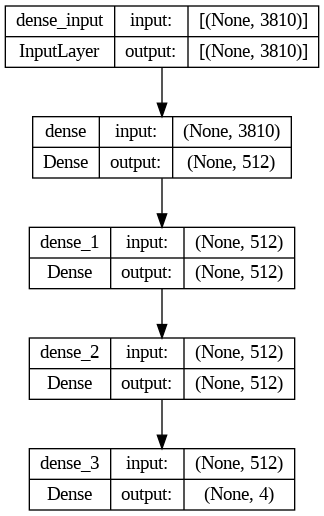

In [22]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes= True, show_layer_names = True)

### Model training choices

For the output layer, 4 output nodes are used, and this is because there are 4 classes. The softmax activation function is used, to ensure that the last layer sums to 1, and reflects the probability of each value.

For the hidden layers, there are 3 hidden layers, each with 256 nodes, and all using ReLu as the activation function for each layer. I have chosen to go with 3 hidden layers with 256 nodes, as from testing anything above that does not lead to measurable increase, but would result in increased computational intensiveness. Having 4 layers or even 3 layers with an increase in nodes per layer would not net much improvement. I chose to use ReLu for the model, as it would address the vanishing gradient issue, and also result in faster learning and convergence.

For the input layer, the size is 3810, and this has been inflated from the original amount due to one-hot encoding. Therefore, I decided not to change the input and perform dimensionality reduction. The model performance does not seem to be drastically affected by it.

### Fitting the model

I chose to use categorical cross entropy for the loss function. Additional metrics used to measure model performance are accuracy, precision and recall. The loss function is essential for training the model. The loss function quantifies the difference between the predicted outputs against expected outputs. This loss function then can be used to adjust the weights, to improve outputs on the next epoch. This cycle continues until the number of defined training epochs are reached.

The model aims to reach a minimum in the loss function, by taking the path that leads to the greatest decrease, this leads to changes in the weights that contribute to corresponding outputs.

Metrics are essential to model fitting to quantify and measure the performance of the model on certain factors, such as how many predictions are correct.

The optimiser that I have decided to use is adam, due to its popularity and convergence speed. In addition, there is not as much need compared to other optimisers to fiddle with hyperparameters.

The training batch size that I opted with is 200, the number of training epochs is 15. As for the learning rate, it is default and has not been adjusted. I opted for a batch size of 200 to have a medium batch size. Increases above 200 are detrimental to model performance. The number of training epochs was kept at 15, as the metrics are already reaching 1, and the decrease in loss has slowed down exponentially.